In [1]:
import glob
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../../../")

from sklearn.tree import DecisionTreeClassifier

from helpers.assess import make_classification_report, make_confusion_matrix
from helpers.split import make_train_test_split, tag_label_feature_split

In [2]:
def decision_tree_experiment(dataset):

    # load data and separate one hot encoded labels from features,
    # transform one hot encoded labels into label strings,
    # then encode label strings

    print(f"\n\nDataset: {dataset}\n")

    df = pd.read_pickle(dataset)
    _, (y, le), X = tag_label_feature_split(df, label_format="encoded")

    # divide into train and test data sets
    X_train_std, X_test_std, y_train, y_test = make_train_test_split(
        X, y, test_size=0.2, random_state=10, stratify=y, x_scaler="standard"
    )

    model = DecisionTreeClassifier(class_weight="balanced")

    model.fit(X_train_std, y_train)

    predictions = model.predict(X_test_std)
    train_accuracy = model.score(X_train_std, y_train)
    test_accuracy = model.score(X_test_std, y_test)

    print(f"Train: {train_accuracy = :f}\n")
    make_classification_report(
        y_train,
        model=model,
        x=X_train_std,
        digits=4,
        label_encoder=le,
        print_report=True,
    )
    print(f"Test: {test_accuracy = :f}\n")
    make_classification_report(
        y_test, y_pred=predictions, digits=4, label_encoder=le, print_report=True
    )

    name = os.path.basename(dataset).split(".")[0]
    make_confusion_matrix(
        y_test,
        y_pred=predictions,
        label_encoder=le,
        title=f"{name} test (row normalized)",
    )

    return model



Dataset: ../../../datasets/dataset_01_mean.pickle

Train: train_accuracy = 0.999473

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.9973  1.0000    0.9987      374  0.9986
  genre_classical     0.9995  0.9998    0.9996     4221  0.9995
    genre_country     1.0000  1.0000    1.0000      327  1.0000
      genre_disco     1.0000  1.0000    1.0000      289  1.0000
     genre_hiphop     0.9988  1.0000    0.9994     1701  0.9993
       genre_jazz     1.0000  0.9992    0.9996     1241  0.9996
      genre_metal     1.0000  1.0000    1.0000      665  1.0000
        genre_pop     1.0000  0.9984    0.9992     4274  0.9989
     genre_reggae     1.0000  1.0000    1.0000      788  1.0000
       genre_rock     0.9988  1.0000    0.9994     3200  0.9992
                                                               
         accuracy                       0.9995    17080  0.9994
        macro avg

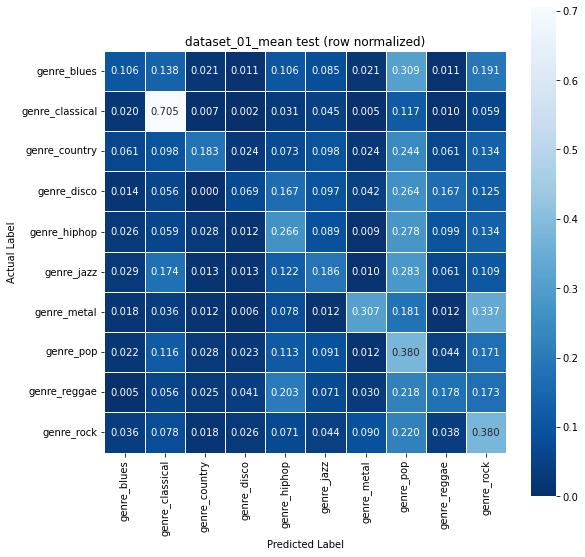



Dataset: ../../../datasets/dataset_02_mean_cov.pickle

Train: train_accuracy = 0.999473

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.9973  1.0000    0.9987      374  0.9986
  genre_classical     0.9995  0.9998    0.9996     4221  0.9995
    genre_country     1.0000  1.0000    1.0000      327  1.0000
      genre_disco     1.0000  1.0000    1.0000      289  1.0000
     genre_hiphop     0.9988  1.0000    0.9994     1701  0.9993
       genre_jazz     1.0000  0.9992    0.9996     1241  0.9996
      genre_metal     1.0000  1.0000    1.0000      665  1.0000
        genre_pop     1.0000  0.9984    0.9992     4274  0.9989
     genre_reggae     1.0000  1.0000    1.0000      788  1.0000
       genre_rock     0.9988  1.0000    0.9994     3200  0.9992
                                                               
         accuracy                       0.9995    17080  0.9994
        macro

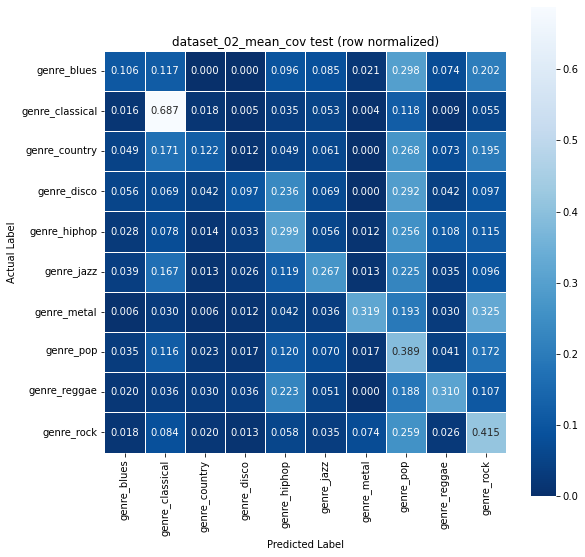



Dataset: ../../../datasets/dataset_03_mean_icov.pickle

Train: train_accuracy = 0.999473

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.9973  1.0000    0.9987      374  0.9986
  genre_classical     0.9995  0.9998    0.9996     4221  0.9995
    genre_country     1.0000  1.0000    1.0000      327  1.0000
      genre_disco     1.0000  1.0000    1.0000      289  1.0000
     genre_hiphop     0.9988  1.0000    0.9994     1701  0.9993
       genre_jazz     1.0000  0.9992    0.9996     1241  0.9996
      genre_metal     1.0000  1.0000    1.0000      665  1.0000
        genre_pop     1.0000  0.9984    0.9992     4274  0.9989
     genre_reggae     1.0000  1.0000    1.0000      788  1.0000
       genre_rock     0.9988  1.0000    0.9994     3200  0.9992
                                                               
         accuracy                       0.9995    17080  0.9994
        macr

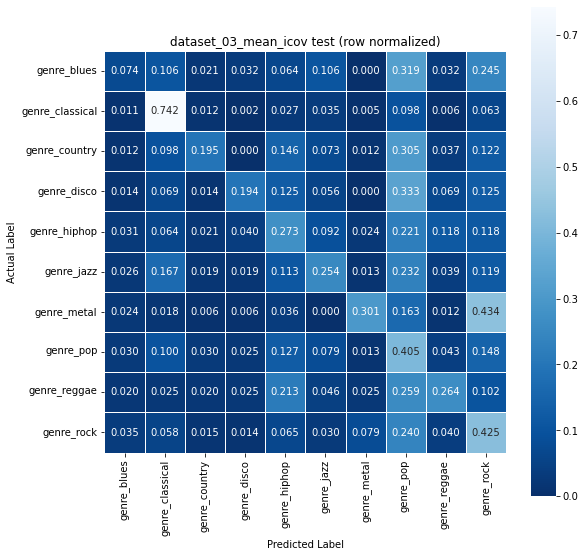



Dataset: ../../../datasets/dataset_04_mean_cov_icov.pickle

Train: train_accuracy = 0.999473

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.9973  1.0000    0.9987      374  0.9986
  genre_classical     0.9995  0.9998    0.9996     4221  0.9995
    genre_country     1.0000  1.0000    1.0000      327  1.0000
      genre_disco     1.0000  1.0000    1.0000      289  1.0000
     genre_hiphop     0.9988  1.0000    0.9994     1701  0.9993
       genre_jazz     1.0000  0.9992    0.9996     1241  0.9996
      genre_metal     1.0000  1.0000    1.0000      665  1.0000
        genre_pop     1.0000  0.9984    0.9992     4274  0.9989
     genre_reggae     1.0000  1.0000    1.0000      788  1.0000
       genre_rock     0.9988  1.0000    0.9994     3200  0.9992
                                                               
         accuracy                       0.9995    17080  0.9994
        

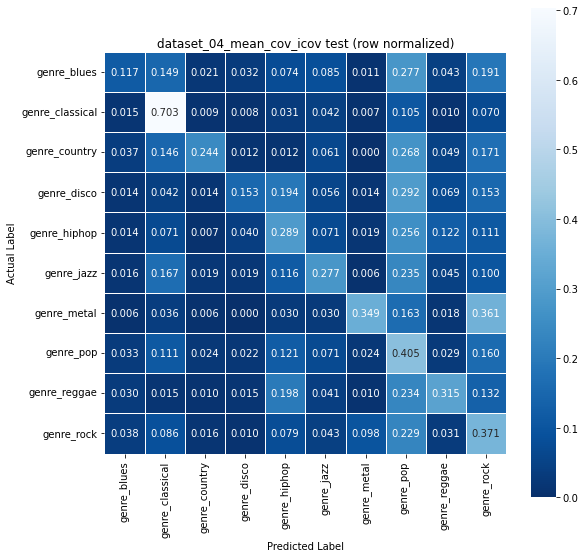



Dataset: ../../../datasets/dataset_05_pvtt.pickle

Train: train_accuracy = 1.000000

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     1.0000  1.0000    1.0000      374  1.0000
  genre_classical     1.0000  1.0000    1.0000     4221  1.0000
    genre_country     1.0000  1.0000    1.0000      327  1.0000
      genre_disco     1.0000  1.0000    1.0000      289  1.0000
     genre_hiphop     1.0000  1.0000    1.0000     1701  1.0000
       genre_jazz     1.0000  1.0000    1.0000     1241  1.0000
      genre_metal     1.0000  1.0000    1.0000      665  1.0000
        genre_pop     1.0000  1.0000    1.0000     4274  1.0000
     genre_reggae     1.0000  1.0000    1.0000      788  1.0000
       genre_rock     1.0000  1.0000    1.0000     3200  1.0000
                                                               
         accuracy                       1.0000    17080  1.0000
        macro avg

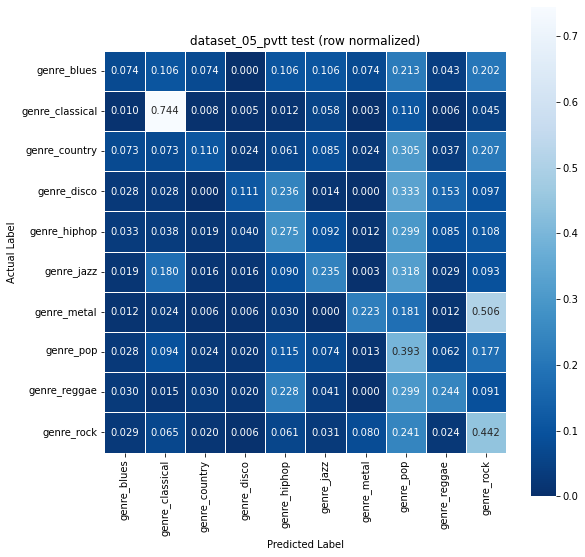



Dataset: ../../../datasets/dataset_06_pvtt_mean.pickle

Train: train_accuracy = 1.000000

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     1.0000  1.0000    1.0000      374  1.0000
  genre_classical     1.0000  1.0000    1.0000     4221  1.0000
    genre_country     1.0000  1.0000    1.0000      327  1.0000
      genre_disco     1.0000  1.0000    1.0000      289  1.0000
     genre_hiphop     1.0000  1.0000    1.0000     1701  1.0000
       genre_jazz     1.0000  1.0000    1.0000     1241  1.0000
      genre_metal     1.0000  1.0000    1.0000      665  1.0000
        genre_pop     1.0000  1.0000    1.0000     4274  1.0000
     genre_reggae     1.0000  1.0000    1.0000      788  1.0000
       genre_rock     1.0000  1.0000    1.0000     3200  1.0000
                                                               
         accuracy                       1.0000    17080  1.0000
        macr

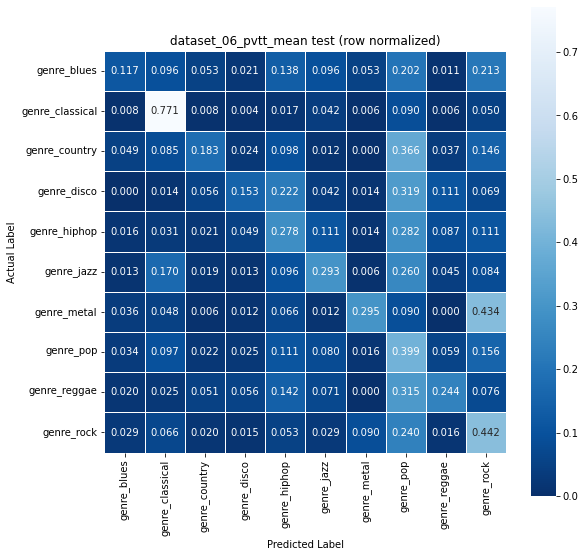



Dataset: ../../../datasets/dataset_07_pvtt_mean_cov.pickle

Train: train_accuracy = 1.000000

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     1.0000  1.0000    1.0000      374  1.0000
  genre_classical     1.0000  1.0000    1.0000     4221  1.0000
    genre_country     1.0000  1.0000    1.0000      327  1.0000
      genre_disco     1.0000  1.0000    1.0000      289  1.0000
     genre_hiphop     1.0000  1.0000    1.0000     1701  1.0000
       genre_jazz     1.0000  1.0000    1.0000     1241  1.0000
      genre_metal     1.0000  1.0000    1.0000      665  1.0000
        genre_pop     1.0000  1.0000    1.0000     4274  1.0000
     genre_reggae     1.0000  1.0000    1.0000      788  1.0000
       genre_rock     1.0000  1.0000    1.0000     3200  1.0000
                                                               
         accuracy                       1.0000    17080  1.0000
        

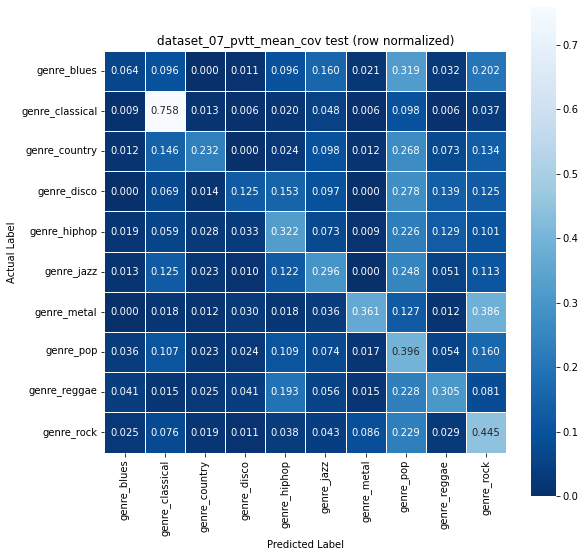



Dataset: ../../../datasets/dataset_08_pvtt_mean_icov.pickle

Train: train_accuracy = 1.000000

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     1.0000  1.0000    1.0000      374  1.0000
  genre_classical     1.0000  1.0000    1.0000     4221  1.0000
    genre_country     1.0000  1.0000    1.0000      327  1.0000
      genre_disco     1.0000  1.0000    1.0000      289  1.0000
     genre_hiphop     1.0000  1.0000    1.0000     1701  1.0000
       genre_jazz     1.0000  1.0000    1.0000     1241  1.0000
      genre_metal     1.0000  1.0000    1.0000      665  1.0000
        genre_pop     1.0000  1.0000    1.0000     4274  1.0000
     genre_reggae     1.0000  1.0000    1.0000      788  1.0000
       genre_rock     1.0000  1.0000    1.0000     3200  1.0000
                                                               
         accuracy                       1.0000    17080  1.0000
       

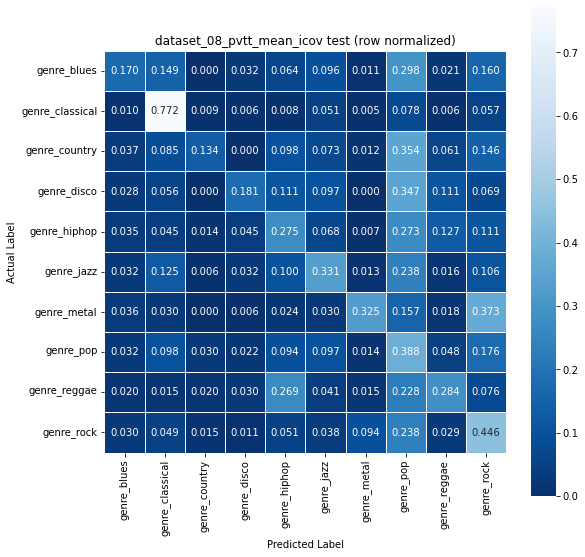



Dataset: ../../../datasets/dataset_09_pvtt_mean_cov_icov.pickle

Train: train_accuracy = 1.000000

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     1.0000  1.0000    1.0000      374  1.0000
  genre_classical     1.0000  1.0000    1.0000     4221  1.0000
    genre_country     1.0000  1.0000    1.0000      327  1.0000
      genre_disco     1.0000  1.0000    1.0000      289  1.0000
     genre_hiphop     1.0000  1.0000    1.0000     1701  1.0000
       genre_jazz     1.0000  1.0000    1.0000     1241  1.0000
      genre_metal     1.0000  1.0000    1.0000      665  1.0000
        genre_pop     1.0000  1.0000    1.0000     4274  1.0000
     genre_reggae     1.0000  1.0000    1.0000      788  1.0000
       genre_rock     1.0000  1.0000    1.0000     3200  1.0000
                                                               
         accuracy                       1.0000    17080  1.0000
   

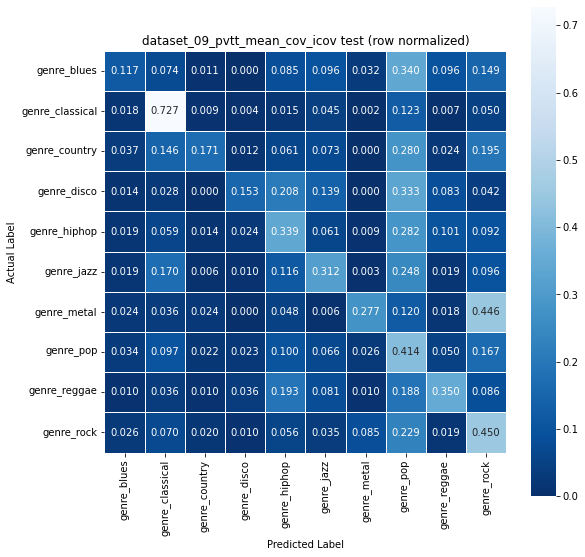



Dataset: ../../../datasets/dataset_10_melspecs_flattened.pickle

Train: train_accuracy = 0.999239

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.9973  1.0000    0.9987      374  0.9986
  genre_classical     0.9995  0.9993    0.9994     4221  0.9992
    genre_country     1.0000  1.0000    1.0000      327  1.0000
      genre_disco     1.0000  1.0000    1.0000      289  1.0000
     genre_hiphop     0.9988  0.9994    0.9991     1701  0.9990
       genre_jazz     1.0000  0.9992    0.9996     1241  0.9996
      genre_metal     1.0000  1.0000    1.0000      665  1.0000
        genre_pop     1.0000  0.9981    0.9991     4274  0.9988
     genre_reggae     0.9949  1.0000    0.9975      788  0.9973
       genre_rock     0.9988  1.0000    0.9994     3200  0.9992
                                                               
         accuracy                       0.9992    17080  0.9991
   

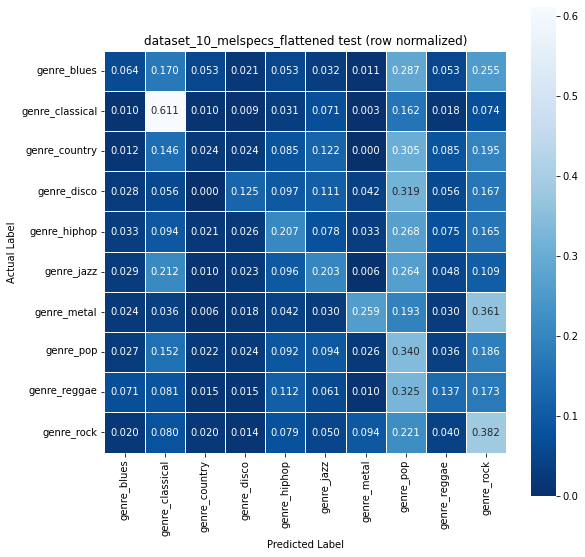

In [3]:
dataset_folder = "../../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])
for dataset in datasets:
    decision_tree_experiment(dataset)